### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

In [36]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

In [4]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


In [5]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']
greater_regions.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,GreaterRegion
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,GreaterRegion
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,GreaterRegion
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,GreaterRegion
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,GreaterRegion


#### 1. **Matriz de Correlación:**

 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

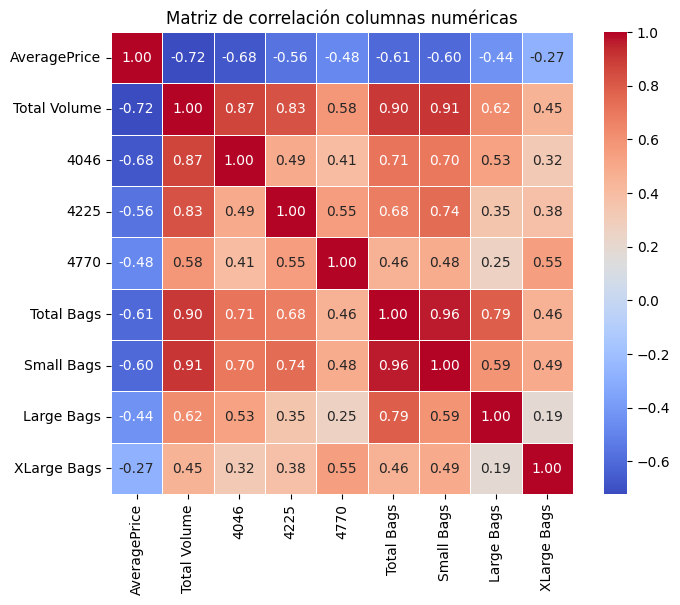

In [7]:
df_corr=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' ]]
matriz_corr=df_corr.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

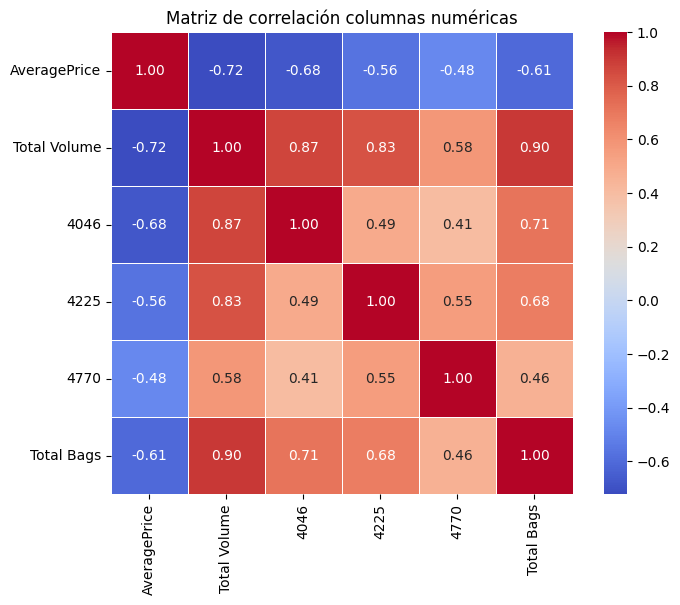

In [8]:
#Sabemos que Total Bags es la combinación de Small Bags, Large Bags i XLarge Bags, así que sacamos esas tres y dejamos solo Total Bags
df_corr2=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags' ]]
matriz_corr2=df_corr2.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr2, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

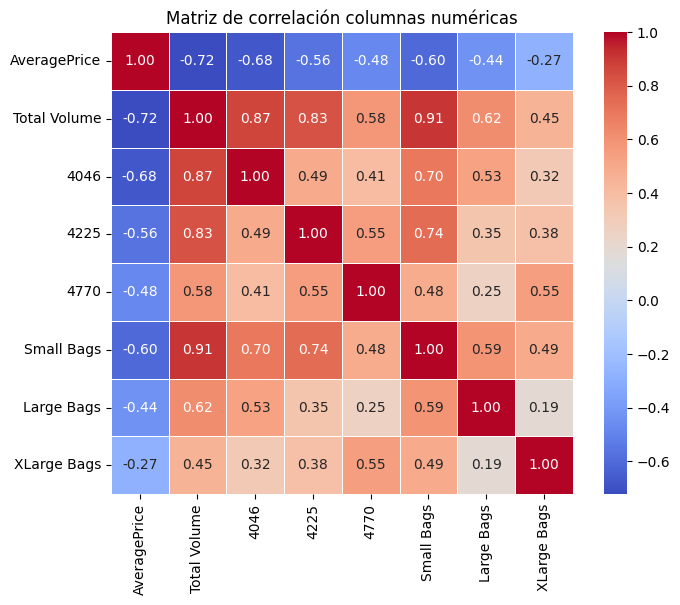

In [14]:
#Vamos a hacer lo contrario, sacaremos el TotalBags y dejaremos las otras tres columnas
df_corr3=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags' ]]
matriz_corr3=df_corr3.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr3, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

Podemos ver que el total volume está altamente correlacionado con el total bags y también la variedad 4046 y 4225. Esto es porque seguramente la venta de las variedades de aguacate (4046, 4225) definen mayormente junto con las total bags el volumen de ventas.

El hecho de que estas variables esten altamente correlacionadas puede influir en el estudio dado que los modelos de regresión lineal con alta correlación entre sus variables pueden resultar altamente inestables, generar errores numéricos y un rendimiento de predicción muy deficiente. 

#### 2. **Análisis de Dispersión entre Variables Clave:** 


   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

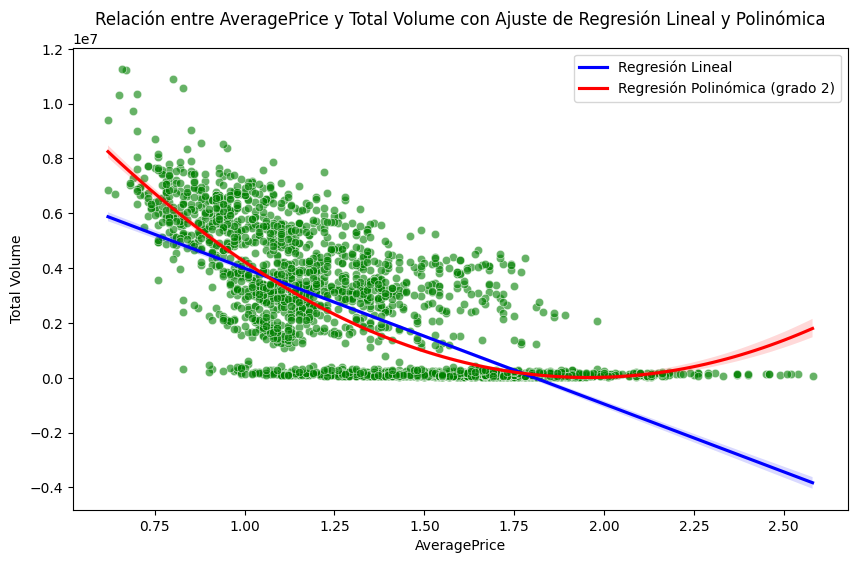

In [9]:
df_dispersion=greater_regions[['Total Volume', 'AveragePrice']]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dispersion, x='AveragePrice', y='Total Volume', alpha=0.6, color='green')

#Añadimos una linea de regresión para ilustrar tendencias. Scatter=False para evitar superponer puntos de dispersion adicionales
sns.regplot(data=df_dispersion, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Lineal", color="blue")

#Vamos a graficar también la regresión polinómica de segundo grado (cuadrática) para contrastarla
sns.regplot(data=df_dispersion, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Polinómica (grado 2)", color="red", order=2)

# Personalización del gráfico
plt.title("Relación entre AveragePrice y Total Volume con Ajuste de Regresión Lineal y Polinómica")
plt.legend()
plt.show()

Podríamos concluir que la regresión polinómica de grado 2 es más ajustada, sobretodo en valores de AveragePrice mayores de 1.75


#### 3. **Predicciones Mensuales Usando Datos Trimestrales:**


   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [23]:
df_predic=greater_regions[['Date', 'AveragePrice', 'Total Volume', 'type']]
df_prediccion=df_predic.copy()
# Asegurarse de que 'Date' esté en formato datetime
df_prediccion['Date'] = pd.to_datetime(df_prediccion['Date'])

# Ordenar por 'Date' en orden ascendente
df_ordenado_por_fecha = df_prediccion.sort_values(by='Date', ascending=True)

# Convertir las fechas a timestamps
df_ordenado_por_fecha['Timestamp'] = df_ordenado_por_fecha['Date'].apply(lambda x: x.timestamp())

#Vamos a separar la variable categorica type en columnas de 1 y 0. 1 es organico, 0 es convencional.
df_ordenado_por_fecha['Conv/Org'] = df_ordenado_por_fecha['type'].map({'organic': 1, 'conventional': 0})

df_ordenado_por_fecha.head(20)



,Date,AveragePrice,Total Volume,type,Timestamp,Conv/Org
9489,2015-01-04,1.24,142349.77,organic,1.420330e+09,1
1559,2015-01-04,1.09,3759282.62,conventional,1.420330e+09,0
1871,2015-01-04,1.01,1683795.30,conventional,1.420330e+09,0
2391,2015-01-04,0.77,5144267.01,conventional,1.420330e+09,0
2443,2015-01-04,0.98,3204112.16,conventional,1.420330e+09,0
2755,2015-01-04,0.89,5794410.58,conventional,1.420330e+09,0
11881,2015-01-04,1.40,187548.30,organic,1.420330e+09,1
363,2015-01-04,0.93,5777334.90,conventional,1.420330e+09,0
11569,2015-01-04,1.75,27365.89,organic,1.420330e+09,1
831,2015-01-04,1.02,3382800.12,conventional,1.420330e+09,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:

# Obtener el primer año del DataFrame
primer_año = df_ordenado_por_fecha['Date'].dt.year.min()

# Filtrar por los dos primeros meses del primer año
df_filtrado = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) &
    (df_ordenado_por_fecha['Date'].dt.month <= 2)
]

df_filtrado

,Date,AveragePrice,Total Volume,type,Timestamp,Conv/Org
9489,2015-01-04,1.24,142349.77,organic,1.420330e+09,1
1559,2015-01-04,1.09,3759282.62,conventional,1.420330e+09,0
1871,2015-01-04,1.01,1683795.30,conventional,1.420330e+09,0
2391,2015-01-04,0.77,5144267.01,conventional,1.420330e+09,0
2443,2015-01-04,0.98,3204112.16,conventional,1.420330e+09,0
...,...,...,...,...,...,...
11562,2015-02-22,1.59,37584.04,organic,1.424563e+09,1
11510,2015-02-22,1.37,81291.05,organic,1.424563e+09,1
9950,2015-02-22,1.68,56569.37,organic,1.424563e+09,1
2436,2015-02-22,1.11,2796195.76,conventional,1.424563e+09,0


In [137]:
df_filtrado[['AveragePrice','Conv/Org', 'Timestamp']].head(10)

,AveragePrice,Conv/Org,Timestamp
9489,1.24,1,1.420330e+09
1559,1.09,0,1.420330e+09
1871,1.01,0,1.420330e+09
2391,0.77,0,1.420330e+09
2443,0.98,0,1.420330e+09
2755,0.89,0,1.420330e+09
11881,1.40,1,1.420330e+09
363,0.93,0,1.420330e+09
11569,1.75,1,1.420330e+09
831,1.02,0,1.420330e+09


In [76]:
#Definimos X e y para el modelo
X=df_filtrado[['AveragePrice','Conv/Org', 'Timestamp']]
y=df_filtrado['Total Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
# 9. Aplicar un Modelo de Regresión Lineal

# Entrenamos un **modelo de regresión lineal** usando los datos de entrenamiento.

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")

pesos=model.coef_
intercept=model.intercept_

print(pesos)
print(intercept)



Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0  6934356.31    4.795984e+06         30.837357
1  5409726.02    4.570456e+06         15.514095
2  1402841.83    3.765077e+06       -168.389273
3  4929884.26    3.832114e+06         22.267668
4    58961.59    6.541212e+05      -1009.402262
5  2578275.12    3.745444e+06        -45.269382
6  2573973.63    3.676977e+06        -42.852180
7    65372.85    5.822998e+05       -790.736373
8    64156.46    8.959274e+05      -1296.472602
9    30207.80   -5.400615e+05       1887.821258

Error cuadrático medio (MSE) del modelo: 900468681643.7123

Valor R² del modelo: 0.8262
[-2.77716903e+06 -2.31707036e+06 -1.34574068e-02]
25914283.45278246


In [85]:
#Ahora le pasamos los datos del tercer mes con estos pesos para extrapolar y predecir en base a este interpolante que sabemos que funciona bien

# Filtrar por el tercer mes del primer año
df_filtrado_tercer_mes = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) &
    (df_ordenado_por_fecha['Date'].dt.month == 3)
]

df_filtrado_tercer_mes

,Date,AveragePrice,Total Volume,type,Timestamp,Conv/Org
9949,2015-03-01,1.69,61260.09,organic,1.425168e+09,1
11873,2015-03-01,1.40,218957.86,organic,1.425168e+09,1
11561,2015-03-01,1.46,47299.44,organic,1.425168e+09,1
1343,2015-03-01,1.14,2538981.60,conventional,1.425168e+09,0
1863,2015-03-01,1.09,1619341.49,conventional,1.425168e+09,0
...,...,...,...,...,...,...
10465,2015-03-29,1.65,64688.75,organic,1.427587e+09,1
11505,2015-03-29,1.42,60007.19,organic,1.427587e+09,1
9477,2015-03-29,1.53,111423.89,organic,1.427587e+09,1
1547,2015-03-29,1.26,3497026.98,conventional,1.427587e+09,0


In [83]:
# Cambiamos pesos a un numpy array
pesos = np.array(pesos)

# Agregamos el intercepto al principio del array de pesos
pesos_intercept = np.insert(pesos, 0, intercept) #agregamos en la posicion 0 el intercept

# Añadir una columna constante de 1s al principio del DataFrame para el intercepto
df_filtrado_mes3 = df_filtrado_tercer_mes.copy()  # Para no modificar el original
df_filtrado_mes3.insert(0, 'Intercept', 1) #agregamos la columna 'Intercept' en la posición 0 y que esté llena de 1os

# Seleccionar las columnas en el orden correcto para la multiplicación
df_prediccion_tercer_mes = df_filtrado_mes3[['Intercept', 'AveragePrice', 'Conv/Org', 'Timestamp']].dot(pesos_intercept)

# Mostrar las predicciones
df_prediccion_tercer_mes

9949    -2.752681e+05
11873    5.301109e+05
11561    3.634808e+05
1343     3.569245e+06
1863     3.708104e+06
             ...     
10465   -1.967375e+05
11505    4.420114e+05
9477     1.365228e+05
1547     3.203429e+06
2743     4.119895e+06
Length: 80, dtype: float64

In [86]:
# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df2 = pd.DataFrame({
    'Valor Real': df_filtrado_tercer_mes['Total Volume'].head(10).values,
    'Valor Predicho': df_prediccion_tercer_mes[:10]
})

comparison_df2['Error Porcentual'] = ((comparison_df2['Valor Real'] - comparison_df2['Valor Predicho']) / comparison_df2['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df2)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(df_filtrado_tercer_mes['Total Volume'], df_prediccion_tercer_mes)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(df_filtrado_tercer_mes['Total Volume'], df_prediccion_tercer_mes)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
        Valor Real  Valor Predicho  Error Porcentual
9949     61260.09   -2.752681e+05        549.343242
11873   218957.86    5.301109e+05       -142.106378
11561    47299.44    3.634808e+05       -668.467454
1343   2538981.60    3.569245e+06        -40.577831
1863   1619341.49    3.708104e+06       -128.988372
10989    36993.47   -3.030398e+05        919.170965
355    6700134.25    4.402396e+06         34.293914
10469    62339.44   -5.309455e+04        185.170082
1551   3780455.44    3.541474e+06          6.321510
10677    56799.83   -7.196151e+05       1366.931819

Error cuadrático medio (MSE) del modelo: 964745989385.4926

Valor R² del modelo: 0.7985


Hemos hecho solo predicción de Total Volume. 
Habría que hacer lo mismo pero con AveragePrice

#### 4. **Predicciones Trimestrales:**


   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [89]:
#Haremos lo mismo q el ejercicio anterior pero con los datos de los dos primeros trimestres
# Filtrar por los dos primeros trimestres del primer año
df_filtrado3 = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) &
    (df_ordenado_por_fecha['Date'].dt.quarter <= 2)
]


In [93]:
#Definimos X e y para el modelo
X=df_filtrado3[['AveragePrice','Conv/Org', 'Timestamp']]
y=df_filtrado3['Total Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
# 9. Aplicar un Modelo de Regresión Lineal

# Entrenamos un **modelo de regresión lineal** usando los datos de entrenamiento.

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")

pesos=model.coef_
intercept=model.intercept_

print(pesos)
print(intercept)


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0  4329239.82    3.443437e+06         20.460921
1  5142259.93    4.570385e+06         11.121072
2    31363.93   -5.126561e+05       1734.540287
3    32022.52   -5.207341e+05       1726.149807
4  2829416.58    3.892432e+06        -37.570138
5  4298883.17    3.429452e+06         20.224588
6  5570915.26    3.971887e+06         28.703159
7  2956859.19    3.856744e+06        -30.433812
8    63674.10   -8.146786e+05       1379.450555
9   218957.86    5.348376e+05       -144.265091

Error cuadrático medio (MSE) del modelo: 731077393524.3757

Valor R² del modelo: 0.8460
[-2.76100420e+06 -2.49999546e+06  3.08994916e-02]
-37136727.725936495


In [94]:
#Ahora le pasamos los datos del tercer trimestre con estos pesos para extrapolar y predecir en base a este interpolante que sabemos que funciona bien

# Filtrar por el tercer trimestre del primer año
df_filtrado_tercer_trim = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) &
    (df_ordenado_por_fecha['Date'].dt.quarter == 3)
]

df_filtrado_tercer_trim

,Date,AveragePrice,Total Volume,type,Timestamp,Conv/Org
10971,2015-07-05,1.92,40423.05,organic,1.436054e+09,1
337,2015-07-05,1.12,6718011.83,conventional,1.436054e+09,0
11491,2015-07-05,1.34,64364.81,organic,1.436054e+09,1
11543,2015-07-05,1.72,27947.09,organic,1.436054e+09,1
2417,2015-07-05,0.99,4295280.16,conventional,1.436054e+09,0
...,...,...,...,...,...,...
11479,2015-09-27,1.53,62096.82,organic,1.443312e+09,1
793,2015-09-27,1.10,2770074.76,conventional,1.443312e+09,0
10439,2015-09-27,1.76,52253.69,organic,1.443312e+09,1
11531,2015-09-27,2.01,22416.55,organic,1.443312e+09,1


In [95]:
# Cambiamos pesos a un numpy array
pesos = np.array(pesos)

# Agregamos el intercepto al principio del array de pesos
pesos_intercept = np.insert(pesos, 0, intercept) #agregamos en la posicion 0 el intercept

# Añadir una columna constante de 1s al principio del DataFrame para el intercepto
df_filtrado_trim = df_filtrado_tercer_trim.copy()  # Para no modificar el original
df_filtrado_trim.insert(0, 'Intercept', 1) #agregamos la columna 'Intercept' en la posición 0 y que esté llena de 1os

# Seleccionar las columnas en el orden correcto para la multiplicación
df_prediccion_tercer_trim = df_filtrado_trim[['Intercept', 'AveragePrice', 'Conv/Org', 'Timestamp']].dot(pesos_intercept)

# Mostrar las predicciones
df_prediccion_tercer_trim

10971   -5.645003e+05
337      4.144298e+06
11491    1.036882e+06
11543   -1.229950e+04
2417     4.503229e+06
             ...     
11479    7.365474e+05
793      4.423775e+06
10439    1.015165e+05
11531   -5.887346e+05
2353     5.058806e+06
Length: 208, dtype: float64

In [96]:
# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df2 = pd.DataFrame({
    'Valor Real': df_filtrado_tercer_trim['Total Volume'].head(10).values,
    'Valor Predicho': df_prediccion_tercer_trim[:10]
})

comparison_df2['Error Porcentual'] = ((comparison_df2['Valor Real'] - comparison_df2['Valor Predicho']) / comparison_df2['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df2)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(df_filtrado_tercer_trim['Total Volume'], df_prediccion_tercer_trim)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(df_filtrado_tercer_trim['Total Volume'], df_prediccion_tercer_trim)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
        Valor Real  Valor Predicho  Error Porcentual
10971    40423.05   -5.645003e+05       1496.481317
337    6718011.83    4.144298e+06         38.310640
11491    64364.81    1.036882e+06      -1510.945631
11543    27947.09   -1.229950e+04        144.009953
2417   4295280.16    4.503229e+06         -4.841334
9931     86288.07    4.846813e+05       -461.701351
1533   4855273.71    3.812978e+06         21.467291
9463    135522.65    1.257507e+05          7.210559
10451    72541.61    2.914110e+05       -301.715596
2365   6380287.71    4.944990e+06         22.495820

Error cuadrático medio (MSE) del modelo: 1157235893897.6707

Valor R² del modelo: 0.7580


Hemos hecho solo predicción de Total Volume con regresión lineal.
Falta hacer predicción también con regresión polinómica y después ambas cosas para AveragePrice.

#### 5. **Predicciones Anuales:**


   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [98]:
# Filtrar por los dos primeros años
df_filtrado_años = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) |
    (df_ordenado_por_fecha['Date'].dt.year == primer_año+1)
]

df_filtrado_años

,Date,AveragePrice,Total Volume,type,Timestamp,Conv/Org
9489,2015-01-04,1.24,142349.77,organic,1.420330e+09,1
1559,2015-01-04,1.09,3759282.62,conventional,1.420330e+09,0
1871,2015-01-04,1.01,1683795.30,conventional,1.420330e+09,0
2391,2015-01-04,0.77,5144267.01,conventional,1.420330e+09,0
2443,2015-01-04,0.98,3204112.16,conventional,1.420330e+09,0
...,...,...,...,...,...,...
14273,2016-12-25,1.21,94378.68,organic,1.482624e+09,1
13753,2016-12-25,1.55,43291.45,organic,1.482624e+09,1
13233,2016-12-25,1.68,72923.61,organic,1.482624e+09,1
13441,2016-12-25,2.00,109788.24,organic,1.482624e+09,1


In [125]:
#Definimos X e y para el modelo
X=df_filtrado_años[['AveragePrice','Conv/Org', 'Timestamp']]
y=df_filtrado_años['Total Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
# 9. Aplicar un Modelo de Regresión Lineal

# Entrenamos un **modelo de regresión lineal** usando los datos de entrenamiento.

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")

pesos=model.coef_
intercept=model.intercept_

print(pesos)
print(intercept)


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0  4792868.29    4.264951e+06         11.014633
1  8706859.44    4.690175e+06         46.132418
2  6114187.88    4.258185e+06         30.355678
3  2105831.09    4.155301e+06        -97.323585
4  6657073.54    4.772432e+06         28.310364
5   140994.25    1.027071e+05         27.155114
6    65483.08    2.666998e+05       -307.280520
7    75740.17    9.321540e+04        -23.072610
8    57957.05    3.070234e+03         94.702570
9    29598.14   -5.155837e+05       1841.946360

Error cuadrático medio (MSE) del modelo: 1154361684295.9749

Valor R² del modelo: 0.7855
[-2.01438010e+06 -2.91108615e+06 -9.26979352e-04]
7556820.574959821


In [132]:
df_tercer_año=df_ordenado_por_fecha[df_ordenado_por_fecha['Date'].dt.year == primer_año+2]

In [135]:
# Cambiamos pesos a un numpy array
pesos = np.array(pesos)

# Agregamos el intercepto al principio del array de pesos
pesos_intercept = np.insert(pesos, 0, intercept) #agregamos en la posicion 0 el intercept

# Añadir una columna constante de 1s al principio del DataFrame para el intercepto
df_tercer_año = df_filtrado_años.copy()  # Para no modificar el original
df_tercer_año.insert(0, 'Intercept', 1) #agregamos la columna 'Intercept' en la posición 0 y que esté llena de 1os

# Seleccionar las columnas en el orden correcto para la multiplicación
df_prediccion_tercer_año = df_tercer_año[['Intercept', 'AveragePrice', 'Conv/Org', 'Timestamp']].dot(pesos_intercept)

# Mostrar las predicciones
df_prediccion_tercer_año

9489     8.312869e+05
1559     4.044530e+06
1871     4.205680e+06
2391     4.689132e+06
2443     4.266112e+06
             ...     
14273    8.339727e+05
13753    1.490834e+05
13233   -1.127860e+05
13441   -7.573876e+05
3588     3.946497e+06
Length: 1664, dtype: float64

In [136]:
# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df2 = pd.DataFrame({
    'Valor Real': df_tercer_año['Total Volume'].head(10).values,
    'Valor Predicho': df_prediccion_tercer_año[:10]
})

comparison_df2['Error Porcentual'] = ((comparison_df2['Valor Real'] - comparison_df2['Valor Predicho']) / comparison_df2['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df2)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(df_tercer_año['Total Volume'], df_prediccion_tercer_año)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(df_tercer_año['Total Volume'], df_prediccion_tercer_año)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
        Valor Real  Valor Predicho  Error Porcentual
9489    142349.77    8.312869e+05       -483.974877
1559   3759282.62    4.044530e+06         -7.587816
1871   1683795.30    4.205680e+06       -149.773857
2391   5144267.01    4.689132e+06          8.847428
2443   3204112.16    4.266112e+06        -33.144898
2755   5794410.58    4.447406e+06         23.246618
11881   187548.30    5.089861e+05       -171.389332
363    5777334.90    4.366831e+06         24.414441
11569    27365.89   -1.960470e+05        816.391672
831    3382800.12    4.185537e+06        -23.729943

Error cuadrático medio (MSE) del modelo: 1226331599568.8274

Valor R² del modelo: 0.7719


Hemos hecho solo la predicción del Total Volume para el tercer año con regresión lineal.
Falta hacerlo en regresión polinómica.
Y hacer ambas cosas para el averagePrice.

#### 6. **Desarrollo de Modelos de Regresión Múltiple:** 


   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

#### 7. **Análisis de Coeficientes de Regresión Múltiple:**


   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

#### 8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**


   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

#### 9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**


   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

#### 10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**


  - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
  - **Esperado:** 
    - Ajusta modelos de regresión lineal y polinómica.
    - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
    - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos. 